# Problem Statement :
## It's a real world Dataset collected via visualcrossing website
## the data will be well cleaned , analysed , visualized & preprocessed
## A model will be trained to predict whether if it will rain or not
## then it will be deployed in an real iot project (Django + esp8266 web server)

# Import Libraries

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lazzy_classi as lc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from statsmodels.tsa.seasonal import seasonal_decompose
import pickle

warnings.filterwarnings('ignore')

# Data Cleaning

In [68]:
df=pd.read_csv("Weather_ds.csv")

In [69]:
df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,humidity,precip,precipprob,precipcover,preciptype,sealevelpressure,cloudcover,uvindex,sunrise,sunset,moonphase
0,2023-05-01,27.9,14.2,20.1,27.0,14.2,51.3,0.0,0.0,0.0,NaN,1016.4,0.2,10.0,2023-05-01T06:10:33,2023-05-01T19:33:16,0.36
1,2023-05-02,28.6,15.0,21.2,27.6,15.0,56.6,0.0,0.0,0.0,NaN,1017.3,0.0,10.0,2023-05-02T06:09:38,2023-05-02T19:33:57,0.39
2,2023-05-03,29.7,16.5,22.6,28.2,16.5,54.3,0.0,0.0,0.0,NaN,1018.2,0.0,10.0,2023-05-03T06:08:44,2023-05-03T19:34:38,0.42
3,2023-05-04,31.7,17.0,23.5,30.4,17.0,57.8,0.0,0.0,0.0,NaN,1013.9,11.8,10.0,2023-05-04T06:07:51,2023-05-04T19:35:18,0.46
4,2023-05-05,30.4,19.8,24.1,28.8,19.8,51.3,0.0,0.0,0.0,NaN,1007.7,5.2,10.0,2023-05-05T06:06:59,2023-05-05T19:35:59,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2025-05-18,34.8,20.1,26.8,32.6,20.1,40.7,0.0,0.0,0.0,NaN,1013.0,79.8,9.0,2025-05-18T05:57:19,2025-05-18T19:45:05,0.70
749,2025-05-19,33.3,17.7,24.6,31.0,17.7,45.0,0.0,0.0,0.0,NaN,1015.3,78.3,9.0,2025-05-19T05:56:45,2025-05-19T19:45:44,0.73
750,2025-05-20,35.6,17.3,25.6,32.9,17.3,36.0,0.0,3.2,0.0,NaN,1014.3,76.4,9.0,2025-05-20T05:56:13,2025-05-20T19:46:22,0.75
751,2025-05-21,36.8,17.7,26.3,34.2,17.7,34.8,0.0,3.2,0.0,NaN,1013.0,18.8,10.0,2025-05-21T05:55:42,2025-05-21T19:47:00,0.80


In [70]:
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,humidity,precip,precipprob,precipcover,preciptype,sealevelpressure,cloudcover,uvindex,sunrise,sunset,moonphase
0,2023-05-01,27.9,14.2,20.1,27.0,14.2,51.3,0.0,0.0,0.0,NaN,1016.4,0.2,10.0,2023-05-01T06:10:33,2023-05-01T19:33:16,0.36
1,2023-05-02,28.6,15.0,21.2,27.6,15.0,56.6,0.0,0.0,0.0,NaN,1017.3,0.0,10.0,2023-05-02T06:09:38,2023-05-02T19:33:57,0.39
2,2023-05-03,29.7,16.5,22.6,28.2,16.5,54.3,0.0,0.0,0.0,NaN,1018.2,0.0,10.0,2023-05-03T06:08:44,2023-05-03T19:34:38,0.42
3,2023-05-04,31.7,17.0,23.5,30.4,17.0,57.8,0.0,0.0,0.0,NaN,1013.9,11.8,10.0,2023-05-04T06:07:51,2023-05-04T19:35:18,0.46
4,2023-05-05,30.4,19.8,24.1,28.8,19.8,51.3,0.0,0.0,0.0,NaN,1007.7,5.2,10.0,2023-05-05T06:06:59,2023-05-05T19:35:59,0.50


In [71]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,humidity,precip,precipprob,precipcover,sealevelpressure,cloudcover,uvindex,moonphase
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,752.000000,753.000000
mean,29.367729,17.711421,22.806507,29.860823,17.622045,63.921647,0.070784,11.960691,1.405578,1014.051394,24.513546,7.789894,0.486879
std,6.099170,5.242749,5.398387,7.096431,5.393188,8.137384,0.301277,32.459011,4.614578,5.197634,22.426298,1.907586,0.287343
min,15.200000,5.300000,10.800000,0.000000,0.000000,28.300000,0.000000,0.000000,0.000000,1002.600000,0.000000,3.000000,0.000000
25%,23.600000,13.100000,17.700000,23.600000,13.100000,60.000000,0.000000,0.000000,0.000000,1010.000000,5.800000,6.000000,0.250000
50%,30.300000,17.700000,23.000000,29.400000,17.700000,65.400000,0.000000,0.000000,0.000000,1013.800000,19.200000,8.000000,0.500000
75%,34.700000,22.700000,28.200000,35.900000,22.700000,69.200000,0.000000,0.000000,0.000000,1017.900000,36.700000,10.000000,0.750000
max,44.800000,26.500000,31.600000,46.100000,26.500000,83.500000,3.500000,100.000000,33.330000,1028.100000,97.500000,10.000000,0.980000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          753 non-null    object 
 1   tempmax           753 non-null    float64
 2   tempmin           753 non-null    float64
 3   temp              753 non-null    float64
 4   feelslikemax      753 non-null    float64
 5   feelslikemin      753 non-null    float64
 6   humidity          753 non-null    float64
 7   precip            753 non-null    float64
 8   precipprob        753 non-null    float64
 9   precipcover       753 non-null    float64
 10  preciptype        129 non-null    object 
 11  sealevelpressure  753 non-null    float64
 12  cloudcover        753 non-null    float64
 13  uvindex           752 non-null    float64
 14  sunrise           753 non-null    object 
 15  sunset            753 non-null    object 
 16  moonphase         753 non-null    float64
dt

In [73]:
df.isna().sum()

datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          624
sealevelpressure      0
cloudcover            0
uvindex               1
sunrise               0
sunset                0
moonphase             0
dtype: int64

In [74]:
df['preciptype'].value_counts()

preciptype
rain    129
Name: count, dtype: int64

In [75]:
df['preciptype'].fillna('no_rain',inplace=True)

In [76]:
df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,humidity,precip,precipprob,precipcover,preciptype,sealevelpressure,cloudcover,uvindex,sunrise,sunset,moonphase
0,2023-05-01,27.9,14.2,20.1,27.0,14.2,51.3,0.0,0.0,0.0,no_rain,1016.4,0.2,10.0,2023-05-01T06:10:33,2023-05-01T19:33:16,0.36
1,2023-05-02,28.6,15.0,21.2,27.6,15.0,56.6,0.0,0.0,0.0,no_rain,1017.3,0.0,10.0,2023-05-02T06:09:38,2023-05-02T19:33:57,0.39
2,2023-05-03,29.7,16.5,22.6,28.2,16.5,54.3,0.0,0.0,0.0,no_rain,1018.2,0.0,10.0,2023-05-03T06:08:44,2023-05-03T19:34:38,0.42
3,2023-05-04,31.7,17.0,23.5,30.4,17.0,57.8,0.0,0.0,0.0,no_rain,1013.9,11.8,10.0,2023-05-04T06:07:51,2023-05-04T19:35:18,0.46
4,2023-05-05,30.4,19.8,24.1,28.8,19.8,51.3,0.0,0.0,0.0,no_rain,1007.7,5.2,10.0,2023-05-05T06:06:59,2023-05-05T19:35:59,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2025-05-18,34.8,20.1,26.8,32.6,20.1,40.7,0.0,0.0,0.0,no_rain,1013.0,79.8,9.0,2025-05-18T05:57:19,2025-05-18T19:45:05,0.70
749,2025-05-19,33.3,17.7,24.6,31.0,17.7,45.0,0.0,0.0,0.0,no_rain,1015.3,78.3,9.0,2025-05-19T05:56:45,2025-05-19T19:45:44,0.73
750,2025-05-20,35.6,17.3,25.6,32.9,17.3,36.0,0.0,3.2,0.0,no_rain,1014.3,76.4,9.0,2025-05-20T05:56:13,2025-05-20T19:46:22,0.75
751,2025-05-21,36.8,17.7,26.3,34.2,17.7,34.8,0.0,3.2,0.0,no_rain,1013.0,18.8,10.0,2025-05-21T05:55:42,2025-05-21T19:47:00,0.80


In [77]:
df=df.drop(columns=['uvindex','sunrise','sunset'])

In [78]:
df

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,humidity,precip,precipprob,precipcover,preciptype,sealevelpressure,cloudcover,moonphase
0,2023-05-01,27.9,14.2,20.1,27.0,14.2,51.3,0.0,0.0,0.0,no_rain,1016.4,0.2,0.36
1,2023-05-02,28.6,15.0,21.2,27.6,15.0,56.6,0.0,0.0,0.0,no_rain,1017.3,0.0,0.39
2,2023-05-03,29.7,16.5,22.6,28.2,16.5,54.3,0.0,0.0,0.0,no_rain,1018.2,0.0,0.42
3,2023-05-04,31.7,17.0,23.5,30.4,17.0,57.8,0.0,0.0,0.0,no_rain,1013.9,11.8,0.46
4,2023-05-05,30.4,19.8,24.1,28.8,19.8,51.3,0.0,0.0,0.0,no_rain,1007.7,5.2,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2025-05-18,34.8,20.1,26.8,32.6,20.1,40.7,0.0,0.0,0.0,no_rain,1013.0,79.8,0.70
749,2025-05-19,33.3,17.7,24.6,31.0,17.7,45.0,0.0,0.0,0.0,no_rain,1015.3,78.3,0.73
750,2025-05-20,35.6,17.3,25.6,32.9,17.3,36.0,0.0,3.2,0.0,no_rain,1014.3,76.4,0.75
751,2025-05-21,36.8,17.7,26.3,34.2,17.7,34.8,0.0,3.2,0.0,no_rain,1013.0,18.8,0.80


In [79]:
df.isna().sum()

datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
sealevelpressure    0
cloudcover          0
moonphase           0
dtype: int64

In [80]:
pd.DataFrame(df['cloudcover'].value_counts())

,count
cloudcover,
0.0,57
1.4,6
0.4,6
2.8,6
10.7,5
...,...
37.6,1
30.5,1
97.5,1


# EDA & visualization

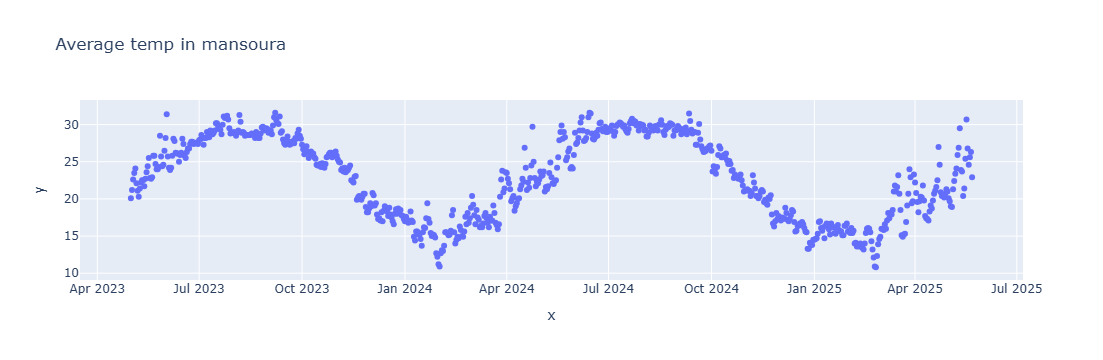

In [106]:
px.scatter(x=df['datetime'],y=df['temp'],title='Average temp in mansoura')

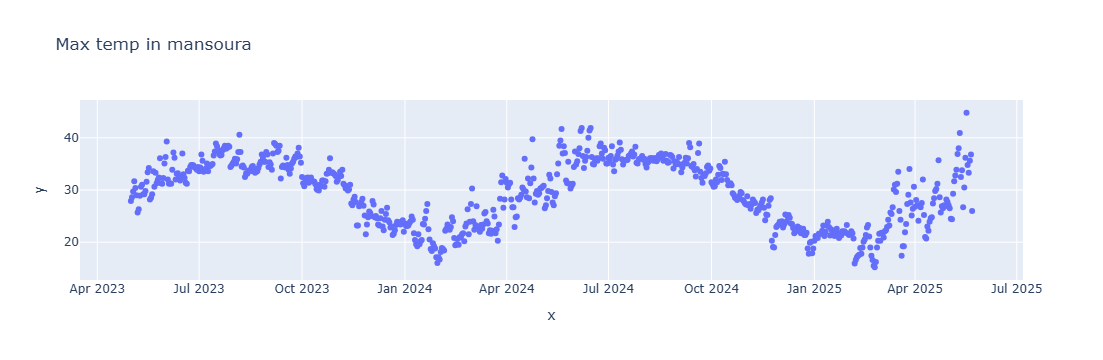

In [81]:
px.scatter(x=df['datetime'],y=df['tempmax'],title='Max temp in mansoura')

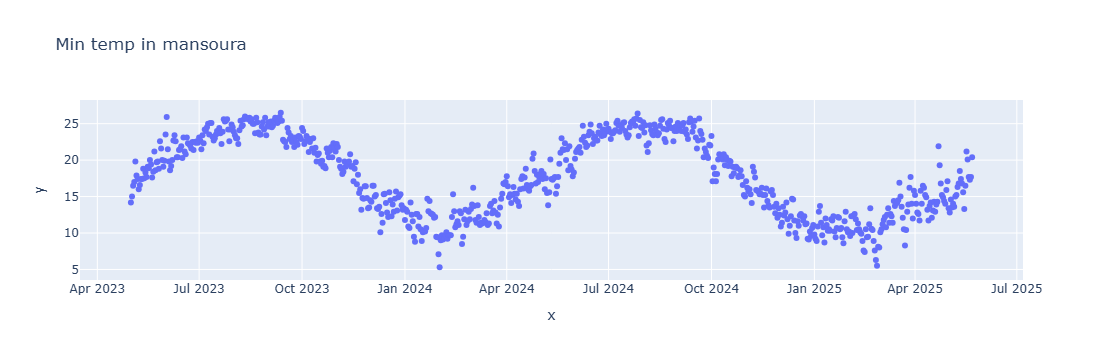

In [82]:
fig=px.scatter(x=df['datetime'],y=df['tempmin'],title="Min temp in mansoura")
fig.show()

## The 3 past plots show a perfect frequent change in temp in mansoura

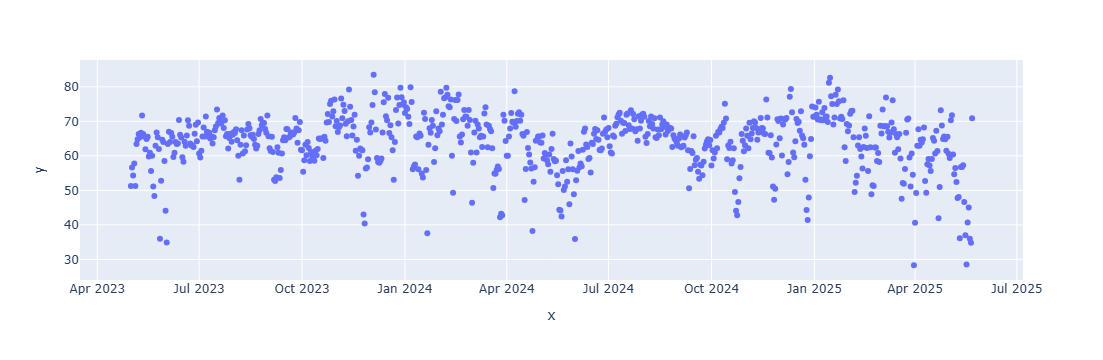

In [83]:
px.scatter(x=df['datetime'],y=df['humidity'])

## The plot shows that the hmidity in egypt has various values in all days {Min: 28.3 ,Max: 83.5}

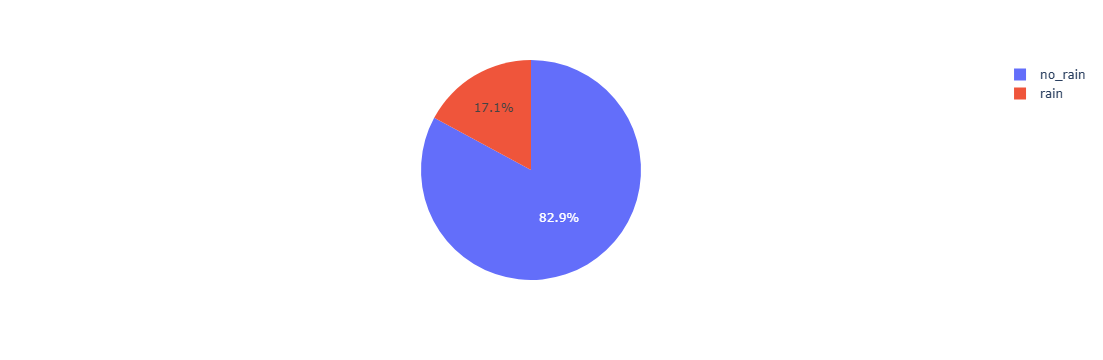

In [84]:
import plotly.express as px
import pandas as pd

precip_counts = df['preciptype'].value_counts().reset_index()
precip_counts.columns = ['preciptype', 'count']

fig = px.pie(precip_counts, names='preciptype', values='count')
fig.show()


## AS the past figure show .. in mansoura 17.1% only of past 753 were rainy

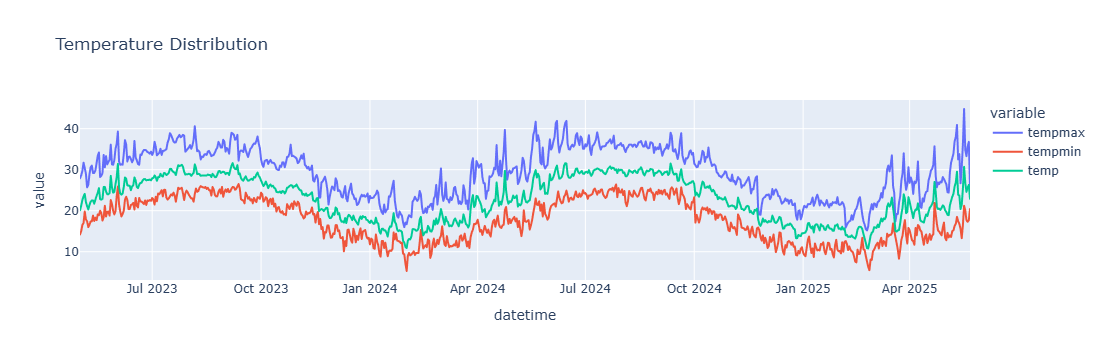

In [107]:
fig = px.line(df, x='datetime', y=['tempmax', 'tempmin', 'temp'], 
              title='Temperature Distribution')
fig.show()

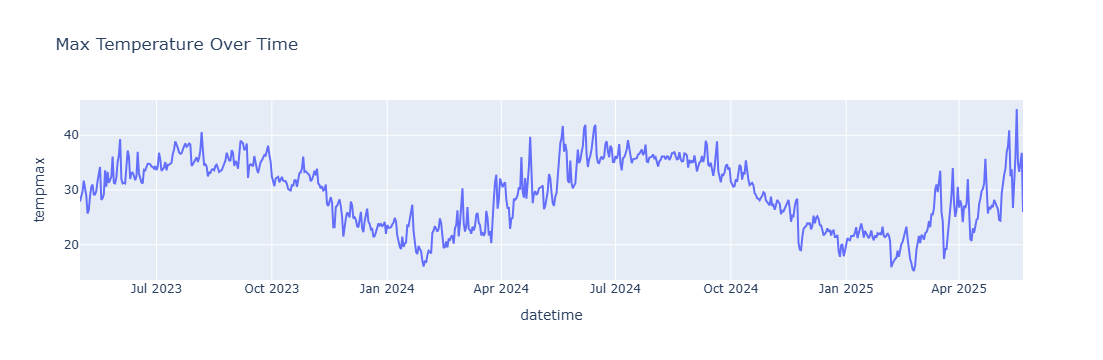

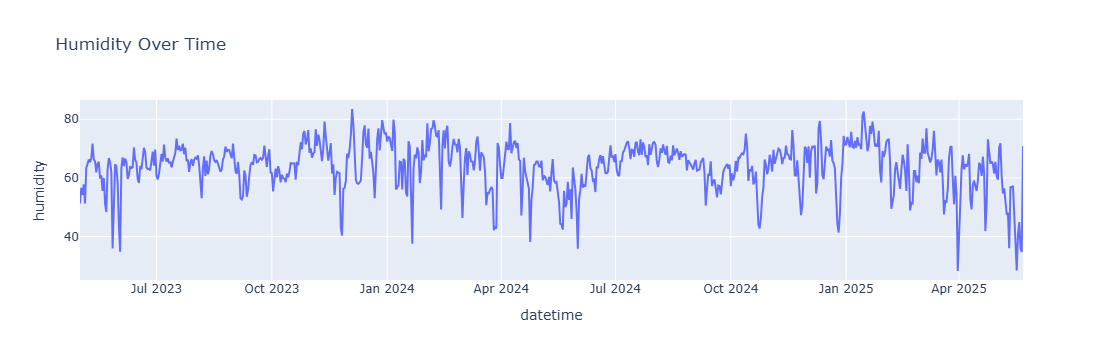

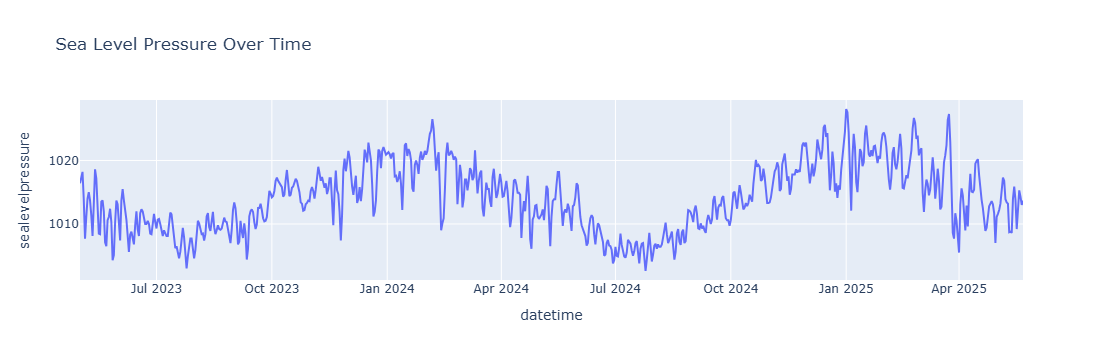

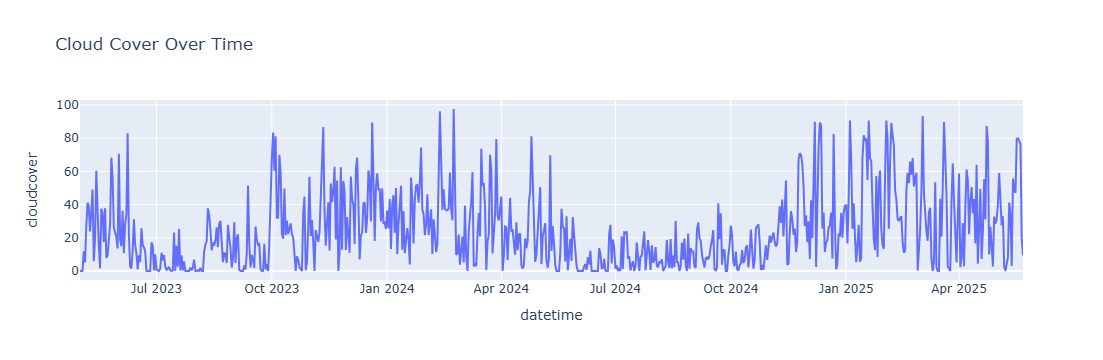

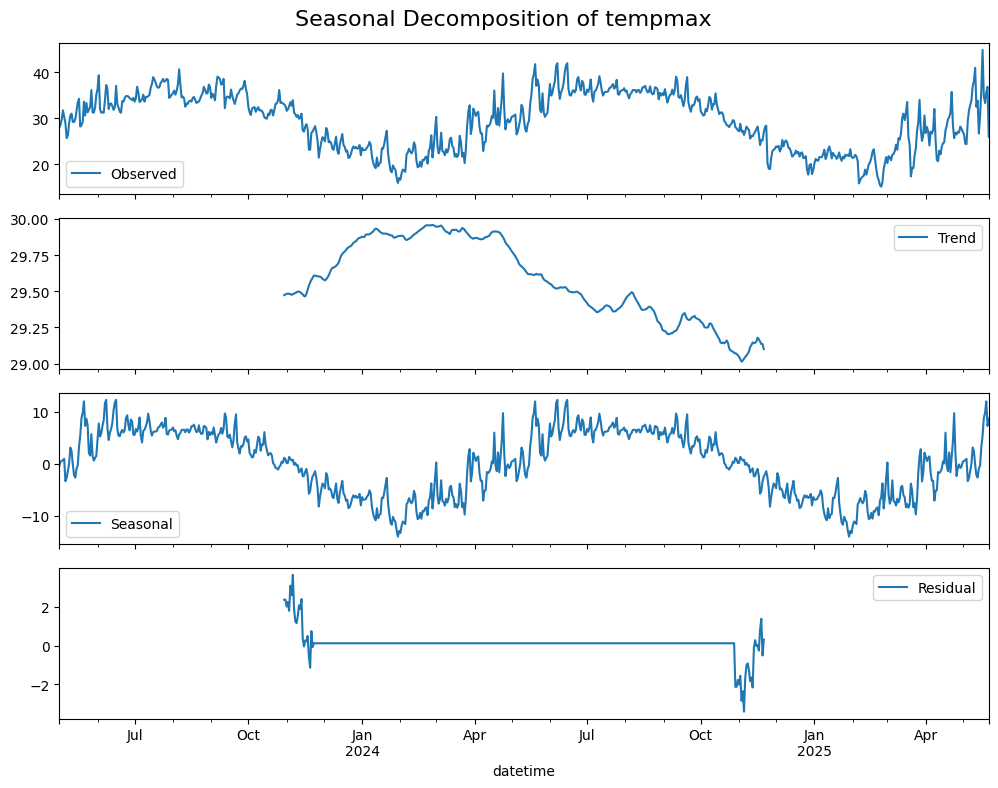

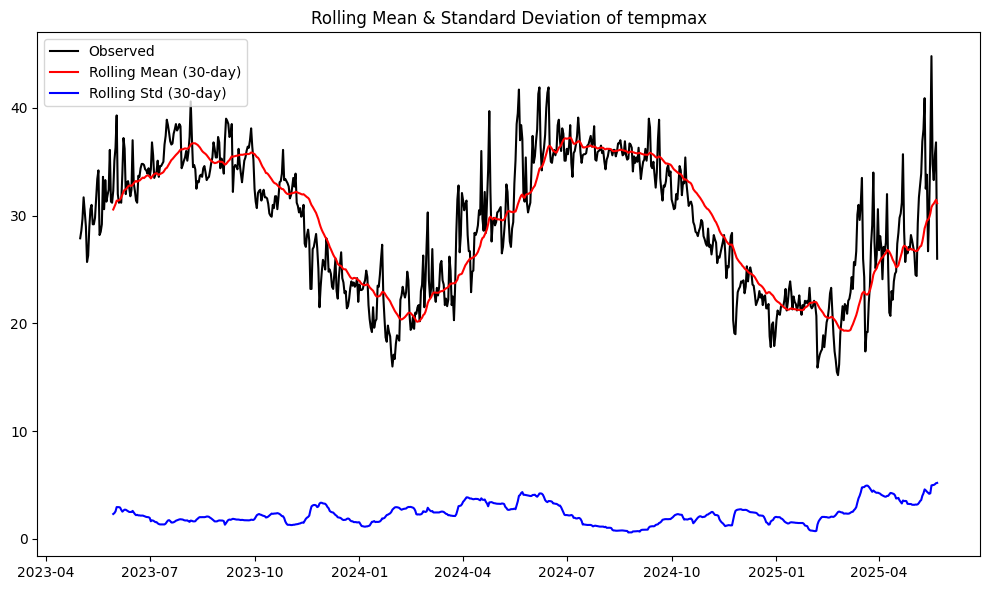

In [113]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime')

# 1.1 Line Plots
def plot_time_series(df, col, title):
    fig = px.line(df, x='datetime', y=col, title=title)
    fig.show()

plot_time_series(df, 'tempmax', 'Max Temperature Over Time')
plot_time_series(df, 'humidity', 'Humidity Over Time')
plot_time_series(df, 'sealevelpressure', 'Sea Level Pressure Over Time')
plot_time_series(df, 'cloudcover', 'Cloud Cover Over Time')

def plot_seasonal_decomposition(df, col, model='additive'):

    # Ensure 'datetime' is the index for decomposition
    decomposed = seasonal_decompose(df.set_index('datetime')[col].dropna(), model=model, period=365)  # Assuming yearly seasonality
    fig, axes = plt.subplots(nrows=4, sharex=True, figsize=(10, 8))
    decomposed.observed.plot(ax=axes[0], label='Observed')
    axes[0].legend()
    decomposed.trend.plot(ax=axes[1], label='Trend')
    axes[1].legend()
    decomposed.seasonal.plot(ax=axes[2], label='Seasonal')
    axes[2].legend()
    decomposed.resid.plot(ax=axes[3], label='Residual')
    axes[3].legend()
    plt.suptitle(f'Seasonal Decomposition of {col}', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_seasonal_decomposition(df, 'tempmax')


# 1.3 Rolling Statistics
def plot_rolling_stats(df, col, window=30):  # 30-day rolling window
    rolling = df.set_index('datetime')[col].rolling(window=window)
    rolling_mean = rolling.mean()
    rolling_std = rolling.std()

    plt.figure(figsize=(10, 6))
    plt.plot(df.set_index('datetime')[col], label='Observed', color='black')
    plt.plot(rolling_mean, label=f'Rolling Mean ({window}-day)', color='red')
    plt.plot(rolling_std, label=f'Rolling Std ({window}-day)', color='blue')
    plt.title(f'Rolling Mean & Standard Deviation of {col}')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_rolling_stats(df, 'tempmax')

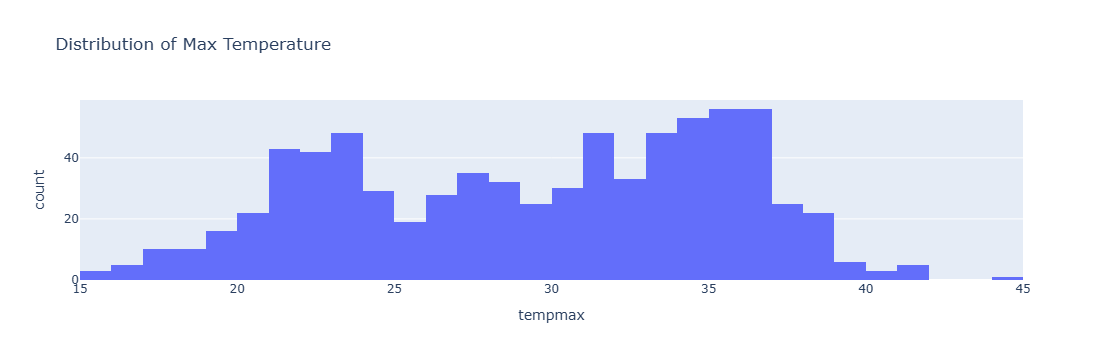

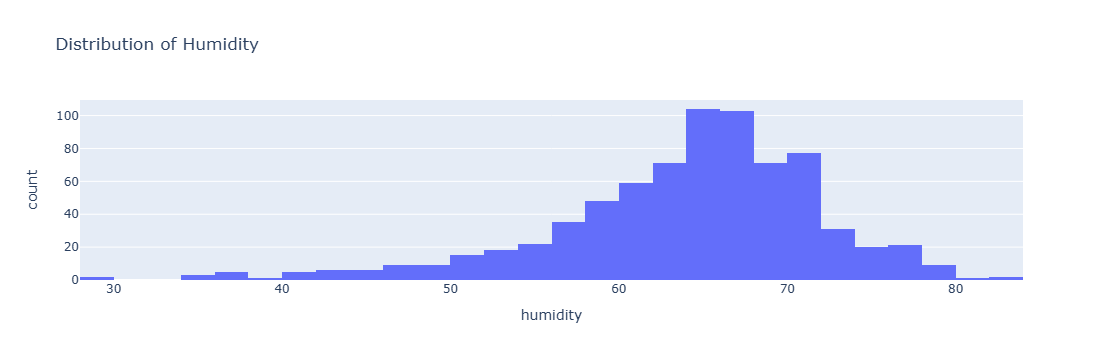

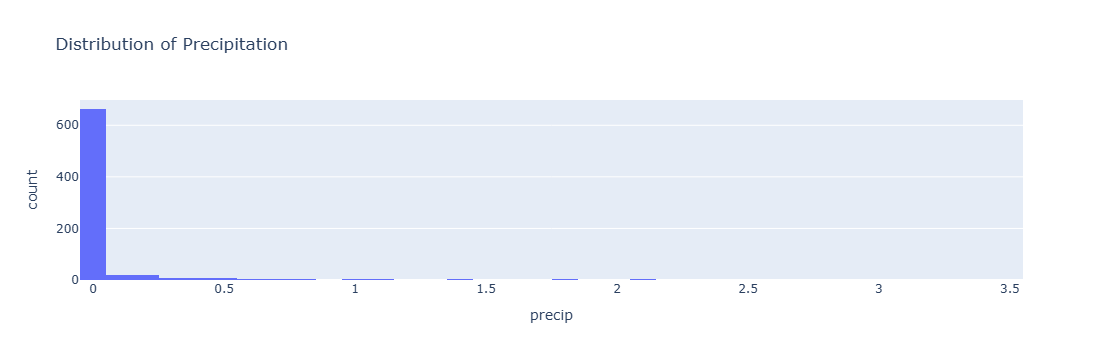

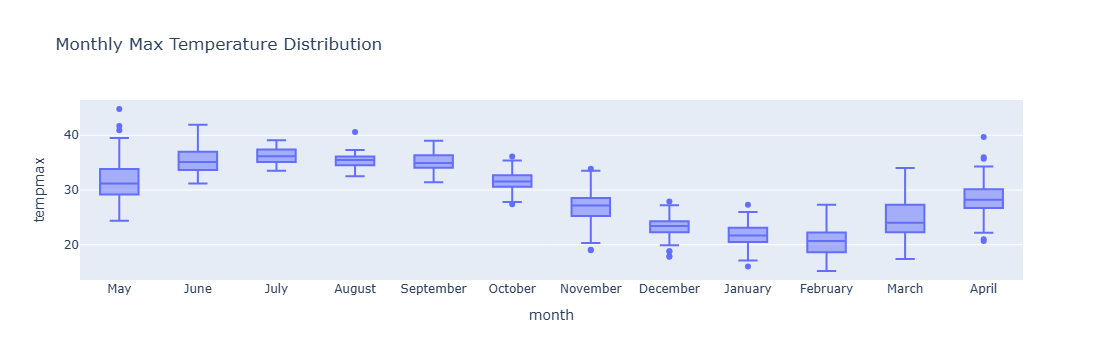

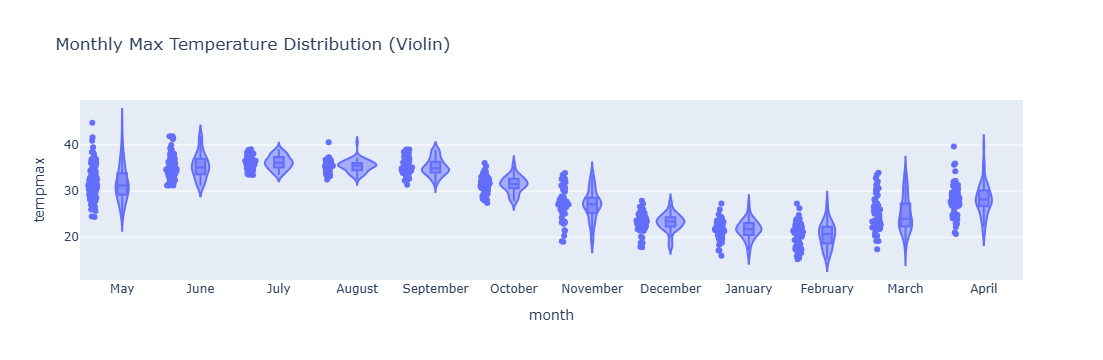

In [115]:
def plot_histogram(df, col, title):
    fig = px.histogram(df, x=col, title=title)
    fig.show()

plot_histogram(df, 'tempmax', 'Distribution of Max Temperature')
plot_histogram(df, 'humidity', 'Distribution of Humidity')
plot_histogram(df, 'precip', 'Distribution of Precipitation')


df['month'] = df['datetime'].dt.month_name()
plot_boxplot(df, 'month', 'tempmax', 'Monthly Max Temperature Distribution')
def plot_violinplot(df, x, y, title):
    fig = px.violin(df, x=x, y=y, title=title, box=True, points="all") # Added box plot and points
    fig.show()

plot_violinplot(df, 'month', 'tempmax', 'Monthly Max Temperature Distribution (Violin)')

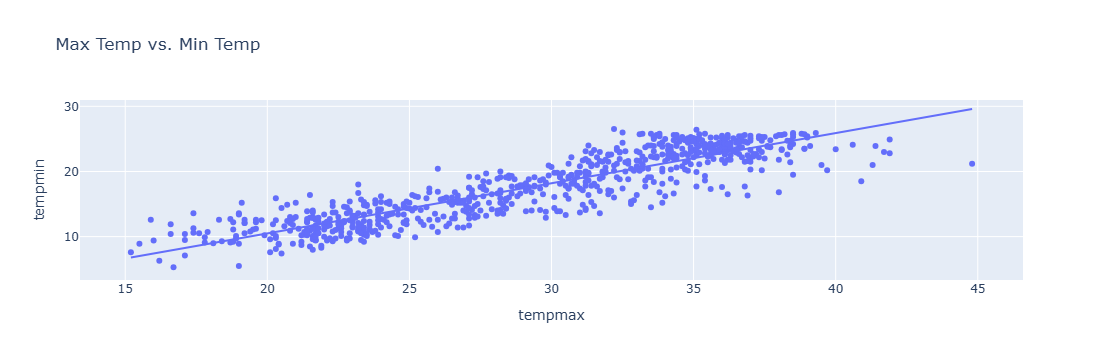

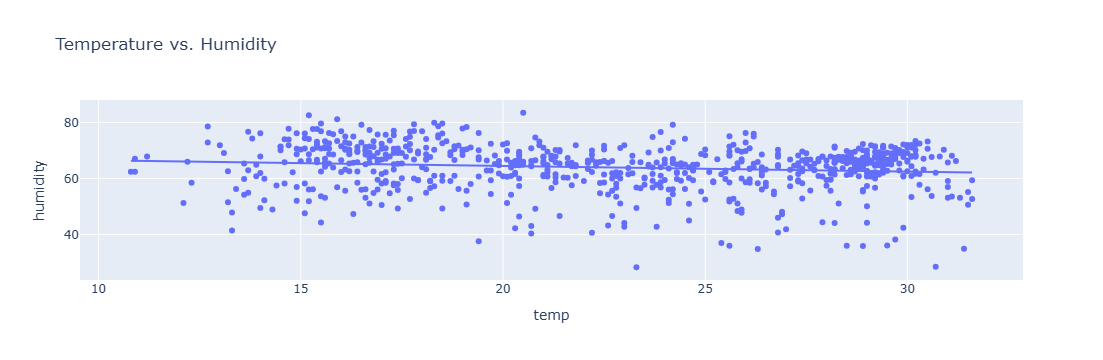

In [118]:
def plot_scatterplot(df, x, y, title):
    fig = px.scatter(df, x=x, y=y, title=title, trendline="ols")  # Added trendline
    fig.show()

plot_scatterplot(df, 'tempmax', 'tempmin', 'Max Temp vs. Min Temp')
plot_scatterplot(df, 'temp', 'humidity', 'Temperature vs. Humidity')

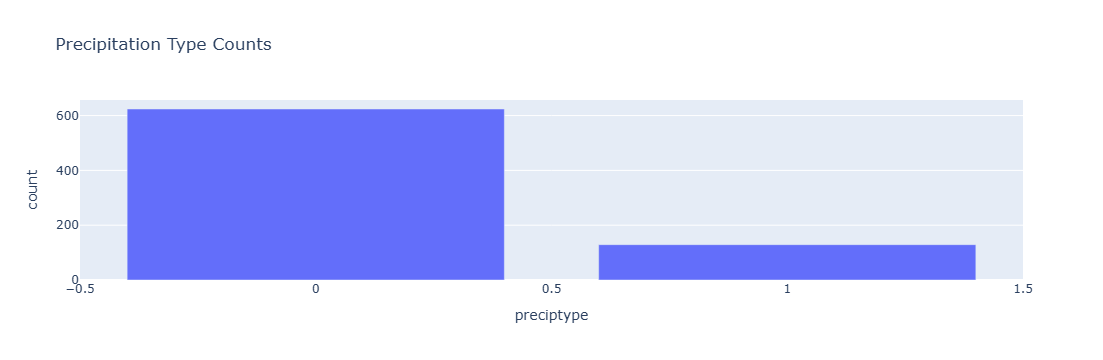

In [119]:
precip_type_counts = df['preciptype'].value_counts().reset_index()
precip_type_counts.columns = ['preciptype', 'count']
fig_precip_type = px.bar(precip_type_counts, x='preciptype', y='count', title='Precipitation Type Counts')
fig_precip_type.show()



<Axes: >

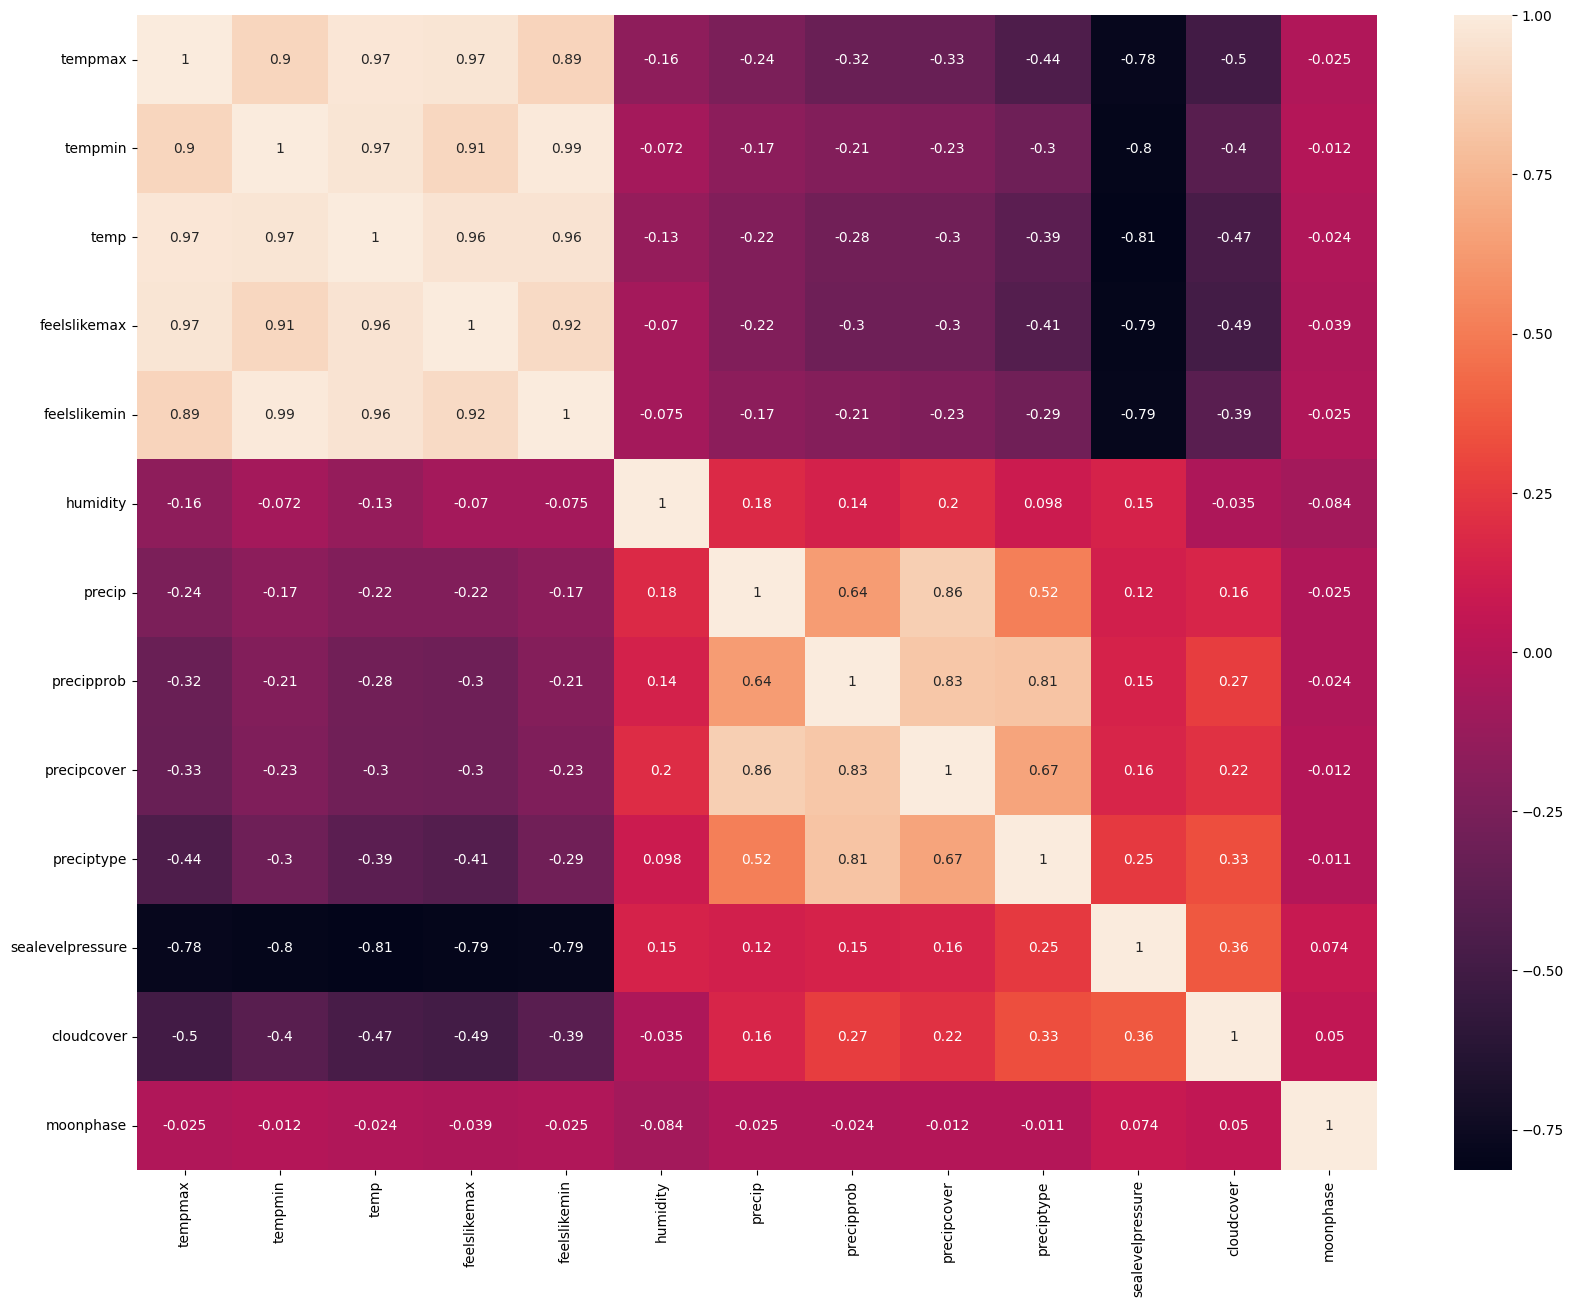

In [109]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [86]:
df['precipcover'].value_counts()

precipcover
0.00     663
4.17      28
8.33      19
12.50     14
16.67     14
20.83      6
29.17      4
25.00      4
33.33      1
Name: count, dtype: int64

In [87]:
df.to_csv('cleaned_data.csv')

In [88]:
df['precip'].value_counts()

precip
0.0    663
0.1     20
0.2     18
0.3      9
0.5      7
0.4      7
0.6      5
1.1      3
0.8      3
1.4      2
2.1      2
1.0      2
1.8      2
0.7      2
3.5      1
2.3      1
0.9      1
1.2      1
1.6      1
3.0      1
1.3      1
2.2      1
Name: count, dtype: int64

# PreProcessing

In [89]:
le=LabelEncoder()
df['preciptype']=le.fit_transform(df['preciptype'])

In [90]:
x=df.drop(columns=['preciptype','datetime'])
y=df['preciptype']

In [91]:
imputer=SMOTE()
x,y=imputer.fit_resample(x,y)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,RocCurveDisplay
import numpy as np
import pandas as pd

models={'XGBclassifier':xgb.XGBClassifier(),'adb':AdaBoostClassifier(),'GB':GradientBoostingClassifier(),"Logistic_regression":LogisticRegression(),"KNN":KNeighborsClassifier(),"Random_forest":RandomForestClassifier()}

def fit_and_score(x_train,x_test,y_train,y_test):
    """
    Fits and evaluate given dictionary of models
    x,_train "training data
    x_test testing data
    y_train training labels
    y_test testing labels
    """
    models=  {'XGBclassifier':xgb.XGBClassifier(),'adb':AdaBoostClassifier(),'GB':GradientBoostingClassifier(),"Logistic_regression":LogisticRegression(),"KNN":KNeighborsClassifier(),"Random_forest":RandomForestClassifier()}
    
    np.random.seed(42)
    model_scores={}
    for name , model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    print(f"model scores is : {model_scores}")    
    pd.DataFrame(model_scores,index=['accuracy']).T.plot.bar()

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,stratify=y,random_state=42)

model scores is : {'XGBclassifier': 0.912, 'adb': 0.896, 'GB': 0.884, 'Logistic_regression': 0.828, 'KNN': 0.872, 'Random_forest': 0.88}


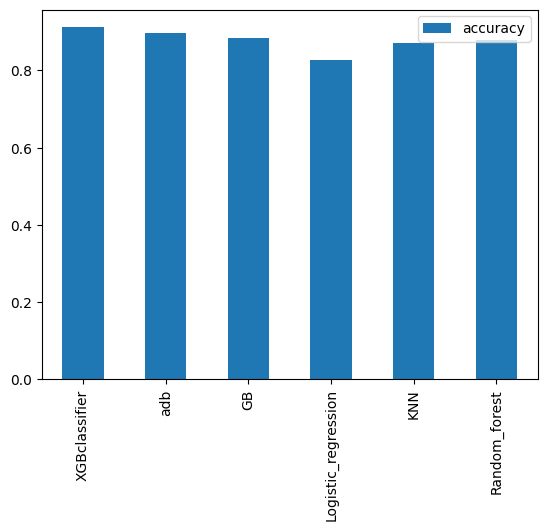

In [97]:
fit_and_score(x_train,x_test,y_train,y_test)

# As shown in graph that the best results got from XGBoost model

In [98]:
model=xgb.XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [99]:
y_pred=model.predict(x_test)

<Axes: >

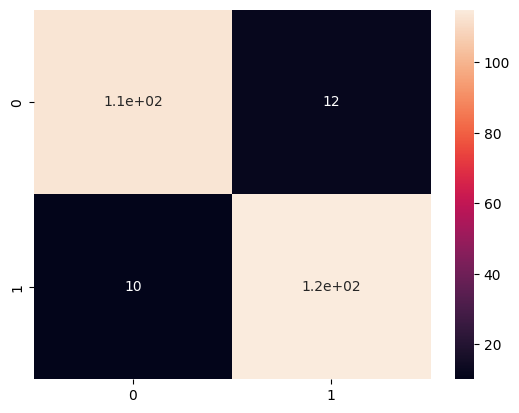

In [100]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       125
           1       0.91      0.92      0.91       125

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [102]:
roc_auc_score(y_pred,y_test)

0.912105499007746

In [103]:
cv_scores = cross_val_score(model, x_train, y_train, cv=5,scoring='accuracy')
print("cross-validation:", cv_scores)
print("mean cv accuracy:", np.mean(cv_scores))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("accuracy on test:",accuracy_score(y_test, y_pred))

cross-validation: [0.88       0.91       0.9        0.90954774 0.90954774]
mean cv accuracy: 0.9018190954773869
accuracy on test: 0.912


In [104]:
# Export the model using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [105]:
model.feature_names_in_

array(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'humidity', 'sealevelpressure', 'cloudcover', 'moonphase'],
      dtype='<U16')